In [1]:
import geopandas as gpd
import pandas as pd
import shapely
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
capmerge = pd.read_csv('../data/capmerge.csv')
georegions = pd.read_csv('../data/georegions.csv')
ratesbymetro = pd.read_csv('../data/ratesbymetro.csv')
nmtracts = gpd.read_file('../data/NM/tl_2018_35_tract.json')

In [3]:
capmerge['install_ratio'] = capmerge.existing_installs_count / capmerge.count_qualified
ratesbymetro['avg_rate'] = ratesbymetro['Thousand Dollars'] / ratesbymetro['Megawatthours']
ratesbymetro['usage'] = ratesbymetro['Megawatthours'] / ratesbymetro['Count']

In [4]:
dataset = capmerge.merge(georegions.merge(ratesbymetro, how='inner', on='GEOID10'), how='inner', on='region_name')

In [5]:
dataset[dataset.state_name_x == 'New Mexico']

,region_name,state_name_x,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,Utility Name,Part,Service Type,Ownership,Thousand Dollars,Megawatthours,Count,eiaid,avg_rate,usage
146,35049010602,New Mexico,35.559280,35.494301,-105.920258,-105.983429,35.531593,-105.955711,1409.30,41,...,Mora-San Miguel Elec Coop,A,Bundled,Cooperative,10330.0,60027.0,10822.0,12901.0,0.172089,5.546757
278,35043010721,New Mexico,35.306339,35.280140,-106.696960,-106.716904,35.294823,-106.706734,1417.80,96,...,Public Service Co of NM,A,Bundled,Investor Owned,427882.7,3227338.0,471935.0,15473.0,0.132581,6.838522
7809,35061970303,New Mexico,34.804482,34.652851,-106.673599,-106.750977,34.745792,-106.718697,1418.65,431,...,Public Service Co of NM,A,Bundled,Investor Owned,427882.7,3227338.0,471935.0,15473.0,0.132581,6.838522
8086,35049001301,New Mexico,35.635681,35.623291,-106.045097,-106.071220,35.630455,-106.058380,1409.30,542,...,Public Service Co of NM,A,Bundled,Investor Owned,427882.7,3227338.0,471935.0,15473.0,0.132581,6.838522
8883,35001003731,New Mexico,35.195202,35.174110,-106.496140,-106.533447,35.183872,-106.515457,1421.20,238,...,Public Service Co of NM,A,Bundled,Investor Owned,427882.7,3227338.0,471935.0,15473.0,0.132581,6.838522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44028,35013000201,New Mexico,32.313091,32.277199,-106.774788,-106.815590,32.295971,-106.795990,1416.95,2131,...,El Paso Electric Co,A,Bundled,Investor Owned,75401.0,720397.0,88405.0,5701.0,0.104666,8.148826
44371,35043010703,New Mexico,35.297192,35.256809,-106.605980,-106.686981,35.275475,-106.645508,1417.80,3469,...,Public Service Co of NM,A,Bundled,Investor Owned,427882.7,3227338.0,471935.0,15473.0,0.132581,6.838522
44459,35001001200,New Mexico,35.078178,35.023449,-106.610451,-106.639938,35.052589,-106.625603,1421.20,2131,...,Public Service Co of NM,A,Bundled,Investor Owned,427882.7,3227338.0,471935.0,15473.0,0.132581,6.838522
44926,35001003400,New Mexico,35.137451,35.105160,-106.604073,-106.639229,35.121647,-106.619499,1421.20,1731,...,Public Service Co of NM,A,Bundled,Investor Owned,427882.7,3227338.0,471935.0,15473.0,0.132581,6.838522


In [6]:
dataset = dataset.astype({'region_name':'str'})
dataset[dataset.state_name_x == 'New Mexico']['region_name']

146      35049010602
278      35043010721
7809     35061970303
8086     35049001301
8883     35001003731
            ...     
44028    35013000201
44371    35043010703
44459    35001001200
44926    35001003400
44989    35001003736
Name: region_name, Length: 214, dtype: object

In [7]:
dataset['savings_10kw_house'] = (((10 * dataset['yearly_sunlight_kwh_kw_threshold_avg']) * dataset['avg_rate']) / .85) - (dataset['usage'] * dataset['avg_rate'])

In [8]:
dataset['state_name_x'].sort_values().unique()

array(['Aguadilla', 'Alabama', 'Alaska', 'Arecibo', 'Arizona', 'Arkansas',
       'Bayamón', 'Cabo Rojo', 'California', 'Canóvanas', 'Carolina',
       'Cataño', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Dorado', 'Florida', 'Georgia', 'Guaynabo',
       'Hatillo', 'Hawaii', 'Hormigueros', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Mayagüez', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Ponce', 'Rhode Island', 'San Juan',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Toa Alta',
       'Toa Baja', 'Trujillo Alto', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [20]:
center = nmtracts[nmtracts.GEOID == '35001003400'].geometry.centroid
area_center = [center.y, center.x]
print(area_center)

[130    35.121525
dtype: float64, 130   -106.619541
dtype: float64]


<ipython-input-20-8364b32a61a4>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = nmtracts[nmtracts.GEOID == '35001003400'].geometry.centroid


In [10]:
#nmtracts = nmtracts.set_crs('epsg:3857')

In [11]:
nmtracts = nmtracts[nmtracts['GEOID'].isin(dataset[dataset.state_name_x == 'New Mexico']['region_name'])]

In [26]:
nmmap = folium.Map(location = area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(nmmap)

folium.GeoJson(data= nmtracts['geometry']).add_to(nmmap)

folium.Choropleth(
    geo_data=nmtracts,
    data=dataset[dataset['state_name_x']=='New Mexico'],
    columns=['region_name','install_ratio'],
    key_on='feature.properties.GEOID',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    bins=8
             ).add_to(nmmap)

for row_i, row_val in dataset[dataset['state_name_x']=='New Mexico'].iterrows():
    #center = row_val.shapes.geometry.centroid
    loc = [(row_val.lat_max + row_val.lat_min)/2,(row_val.lng_max + row_val.lng_min)/2]
    pop = str(row_val['region_name']) + str(" - ") + str(row_val['state_name_x']) + str(' - ') + str(row_val['savings_10kw_house']) 
    if row_val['lat_max'] > 0:
        icon = folium.Icon(icon='sun-o', prefix='fa', color='green')
    else:
        icon = folium.Icon(icon='solar-panel', prefix='fa', color='red')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
        icon = icon)
    marker.add_to(marker_cluster)
    
nmmap.save('../data/nmmap.html')

In [13]:
dataset.region_name                                                  

0        13115000201
1        18057110512
2        48141010405
3        25017383800
4        12099980000
            ...     
45117     6071012700
45118    48113010000
45119    12119911200
45120    49035114500
45121    47157022600
Name: region_name, Length: 45122, dtype: object

In [14]:
nmtracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 214 entries, 2 to 489
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   214 non-null    object  
 1   COUNTYFP  214 non-null    object  
 2   TRACTCE   214 non-null    object  
 3   GEOID     214 non-null    object  
 4   NAME      214 non-null    object  
 5   NAMELSAD  214 non-null    object  
 6   MTFCC     214 non-null    object  
 7   FUNCSTAT  214 non-null    object  
 8   ALAND     214 non-null    int64   
 9   AWATER    214 non-null    int64   
 10  INTPTLAT  214 non-null    object  
 11  INTPTLON  214 non-null    object  
 12  geometry  214 non-null    geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 23.4+ KB


In [15]:
dataset[dataset['state_name_x']=='New Mexico'].sort_values('savings_10kw_house', ascending=False).iloc[0]

region_name           35049010602
state_name_x           New Mexico
lat_max                  35.55928
lat_min                 35.494301
lng_max               -105.920258
                         ...     
Count                     10822.0
eiaid                     12901.0
avg_rate                 0.172089
usage                    5.546757
savings_10kw_house    2852.284839
Name: 146, Length: 96, dtype: object

In [16]:
dataset[dataset['eiaid']==19547].sort_values('avg_rate',ascending=False)

,region_name,state_name_x,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,Part,Service Type,Ownership,Thousand Dollars,Megawatthours,Count,eiaid,avg_rate,usage,savings_10kw_house
68,15003981000,Hawaii,21.407650,21.376980,-157.747513,-157.766815,21.393612,-157.758575,1269.9,10,...,A,Bundled,Investor Owned,507552.3,1634975.0,272590.0,19547.0,0.310434,5.997927,4636.0263
22225,15003006804,Hawaii,21.366461,21.354660,-157.899918,-157.923767,21.360542,-157.911865,1269.9,694,...,A,Bundled,Investor Owned,507552.3,1634975.0,272590.0,19547.0,0.310434,5.997927,4636.0263
26637,15003000401,Hawaii,21.331289,21.277700,-157.752670,-157.783752,21.301744,-157.770477,1269.9,964,...,A,Bundled,Investor Owned,507552.3,1634975.0,272590.0,19547.0,0.310434,5.997927,4636.0263
26837,15003006805,Hawaii,21.361111,21.344690,-157.895447,-157.921783,21.352341,-157.905640,1269.9,680,...,A,Bundled,Investor Owned,507552.3,1634975.0,272590.0,19547.0,0.310434,5.997927,4636.0263
26856,15003001300,Hawaii,21.289120,21.277920,-157.798264,-157.813354,21.283363,-157.805878,1269.9,1148,...,A,Bundled,Investor Owned,507552.3,1634975.0,272590.0,19547.0,0.310434,5.997927,4636.0263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16017,15003008609,Hawaii,21.344080,21.326740,-158.089539,-158.116257,21.335024,-158.103928,1269.9,364,...,A,Bundled,Investor Owned,507552.3,1634975.0,272590.0,19547.0,0.310434,5.997927,4636.0263
16282,15003001202,Hawaii,21.298861,21.289200,-157.795166,-157.804520,21.293264,-157.799774,1269.9,892,...,A,Bundled,Investor Owned,507552.3,1634975.0,272590.0,19547.0,0.310434,5.997927,4636.0263
16699,15003006402,Hawaii,21.363131,21.339861,-157.820145,-157.867828,21.352694,-157.845825,1269.9,876,...,A,Bundled,Investor Owned,507552.3,1634975.0,272590.0,19547.0,0.310434,5.997927,4636.0263
17102,15003004100,Hawaii,21.313009,21.302000,-157.847580,-157.858154,21.307686,-157.852570,1269.9,317,...,A,Bundled,Investor Owned,507552.3,1634975.0,272590.0,19547.0,0.310434,5.997927,4636.0263


<AxesSubplot:>

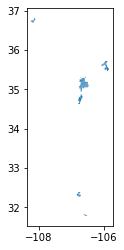

In [17]:
nmtracts.plot()

In [18]:
nmtracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 214 entries, 2 to 489
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   214 non-null    object  
 1   COUNTYFP  214 non-null    object  
 2   TRACTCE   214 non-null    object  
 3   GEOID     214 non-null    object  
 4   NAME      214 non-null    object  
 5   NAMELSAD  214 non-null    object  
 6   MTFCC     214 non-null    object  
 7   FUNCSTAT  214 non-null    object  
 8   ALAND     214 non-null    int64   
 9   AWATER    214 non-null    int64   
 10  INTPTLAT  214 non-null    object  
 11  INTPTLON  214 non-null    object  
 12  geometry  214 non-null    geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 23.4+ KB
